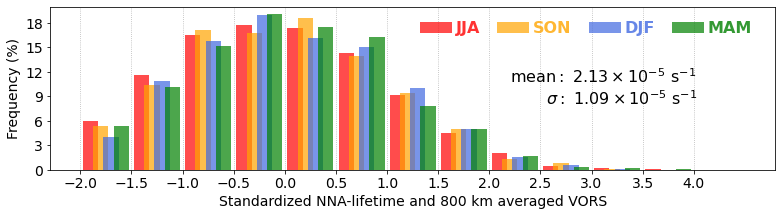

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def frequency(df, bins) : 

    
    # Step 1 : Determine average of VORS_av08 over all grid points
    #          that are within CRCM6 domain

    avg_vors = df.groupby('storm')['VORS_av08'].mean()

    # Step 2 : Determine standardized value of the averaged VORS_av08  

    std_vors = (avg_vors - avg_vors.mean()) / avg_vors.std()

    # Step 3 : Calculate occurence of every value for every bin  

    frequency, _ = np.histogram(std_vors, bins=bins)

    # Step 4 Calculate frequency distribution (%)
    
    tot_etc = len(std_vors)
    pct = (frequency / tot_etc) * 100

    return pct


def custom_legend(legend, seasons, colors) : 

    # Step 1 : Iterate through all seasons and customize accordingly

    for i, color in zip(range(0,len(seasons)), colors):

        legend.get_texts()[i].set_position((-9, 0.5))
        first_text = legend.get_texts()[i]  # Get the first legend text
        first_text.set_fontweight('bold')   # Set font weight to bold
        first_text.set_color(color)
        first_text.set_alpha(0.8)           # transparency


def custom_layout(max_pct, bins) : 


    # Step 1 : set ticks 
    
    plt.xticks(bins[:-1])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.yticks(np.arange(0, max_pct, 3))

    # Step 2 : set labels 
    
    plt.xlabel('Standardized NNA-lifetime and 800 km averaged VORS', fontsize=14)
    plt.ylabel('Frequency (%)', fontsize=14)

    # Step 3 : set grid

    plt.grid(which='major', axis='x', linestyle='dotted')




def set_textbox(mean, sigma) : 


    # Step 1 : Change mean and sigma format to keep 2 significant numbers

    mean = '{:0.2e}'.format(mean)
    sigma = '{:0.2e}'.format(sigma)

    # Step 2 : Transform first 4 digits into string (ex : 0.93e-05 = "0.93")
    mean = mean[0 : 4]
    sigma = sigma[0 : 4]

    # Step 3 : Create textbox
    
    textstr = '\n'.join((
    r'$\mathrm{mean}:\ %s \times 10^{-5} \ \mathrm{s^{-1}}$' % mean,
    r'$\qquad \ \sigma:\ %s \times 10^{-5} \ \mathrm{s^{-1}}$' % sigma))
    
    return textstr




def create_fig(file_in , file_out, seasons) : 

    # Step 1 : read csv file and affect initial variables

    df24 = pd.read_csv(file_in)
    bins = np.arange(-2, 5, 0.5)

    crcm6 = df24.loc[df24.HU == True]             # keep rows that are within CRCM6 domain
    colors = ['red', 'orange', 'royalblue', 'g']

    i = 0.1                                       # To shift bars position in plot
    max_pct = 0                                   # To format y axis in plot

    # Step 2 : Iterate through all seasons and create bar plot
    
    plt.figure(figsize=(13,3))
    
    for season, color in zip(seasons, colors) : 

        df = df24.loc[(df24.season == season) & (df24.HU == True)]
        pct = frequency(df, bins)
        plt.bar(bins[:-1]+i, pct, width=0.15, alpha=0.7,label=season, color=color)

        # establish the max frequency for y limit axis on the bar plot later

        if max(pct) > max_pct : 
            max_pct = max(pct)

        i += 0.1

    # Step 3 : Add custom legend

    legend = plt.legend(frameon=False, ncol=len(seasons), fontsize=16, columnspacing=0.5)
    custom_legend(legend, seasons, colors)

    # Step 4 : Add x and y axis

    custom_layout(max_pct, bins)

    # Step 5 : Calculate mean and standard deviation
    
    vors = df24.loc[df24.HU==True]
    mean = vors['VORS_av08'].mean()
    sigma = vors['VORS_av08'].std()

    # Step 6 : Add textbox

    textstr = set_textbox(mean, sigma)
    plt.text(2.2, 8, textstr, fontsize=16)

    # Step 7 : show plot and save output in file_out

   # plt.show()
    plt.savefig(file_out)

file_in = '/pampa/cloutier/etc24_consec.csv'
file_out = '/pampa/cloutier/freq_dist.png'
seasons = ['JJA', 'SON', 'DJF', 'MAM']
create_fig(file_in , file_out, seasons) 